## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/monicabustillos/Documents/matplotlib-homework/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/monicabustillos/Documents/matplotlib-homework/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice. 249
mice = df.groupby(['Mouse ID']).count()
mice
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice2 = mice.groupby(['Mouse ID','Timepoint']).count()
mice2
# Optional: Get all the data for the duplicate mouse ID. 

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse = df.drop_duplicates(subset = ['Mouse ID'], keep='last')
# Checking the number of mice in the clean DataFrame.
mouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 9 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Drug Regimen        249 non-null    object 
 2   Sex                 249 non-null    object 
 3   Age_months          249 non-null    int64  
 4   Weight (g)          249 non-null    int64  
 5   Timepoint           249 non-null    int64  
 6   Tumor Volume (mm3)  249 non-null    float64
 7   Metastatic Sites    249 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.5+ KB


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug = mouse.groupby('Drug Regimen')['Tumor Volume (mm3)']
count = drug.count()


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# sdxxzof the tumor volume for each regimen
mean = drug.mean()
# print(mean)
median = drug.median()
# print(median)
variance = drug.var()
# print(variance)
std_dev = drug.std()
# print(std_dev)
sem = drug.sem()
# print(sem)
summary1 = pd.DataFrame({'Mean':mean,
                         'Median':median,
                         'Varaince':variance,
                         'Standard Deviation':std_dev,
                         'SEM': sem})
summary1

,Mean,Median,Varaince,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [6]:
# Using the aggregation method, produce the same summary statistics in a single line
summary = df.groupby(df['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median', 'var','std','sem'])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [25]:
print(count)

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Tumor Volume (mm3), dtype: int64


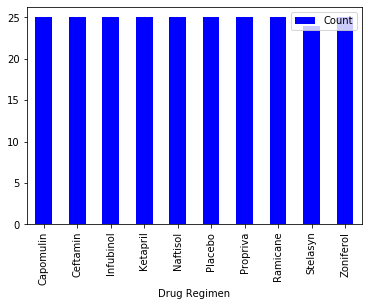

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg = pd.DataFrame({'Count': count})
drug_reg_plot = drug_reg.plot.bar(color='blue')

([<matplotlib.axis.XTick at 0x7fe4440a2ac8>,
 <a list of 10 Text xticklabel objects>)

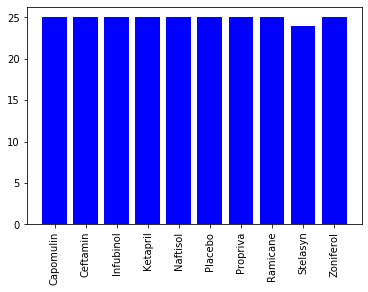

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(count))
plt.bar(x_axis, count, color='b')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count.index, rotation=90)

In [28]:
count.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
